In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, root_mean_squared_error

import matplotlib.pyplot as plt

In [2]:
# BASE
from sklearn.datasets import make_regression
n_features = 10

X, y = make_regression(
    n_samples=1000, n_features=n_features,
    n_informative=6,
    effective_rank=3,
    bias=10,
    noise=5,
    random_state=42
)

feature_df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(n_features)])
target_df = pd.DataFrame(y, columns=['target'])

df = pd.concat([
    feature_df, target_df
], axis=1)

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [3]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

train_r2_score = r2_score(y_train, y_train_pred)
train_rmse = root_mean_squared_error(y_train, y_train_pred)

test_r2_score = r2_score(y_test, y_test_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

result_df = pd.DataFrame(
    [
        [train_r2_score, train_rmse],
        [test_r2_score, test_rmse]
    ],
    columns=['r2_score', 'rmse'],
    index=['train', 'test']
)
result_df

,r2_score,rmse
train,0.265146,4.838800
test,0.292786,4.779277


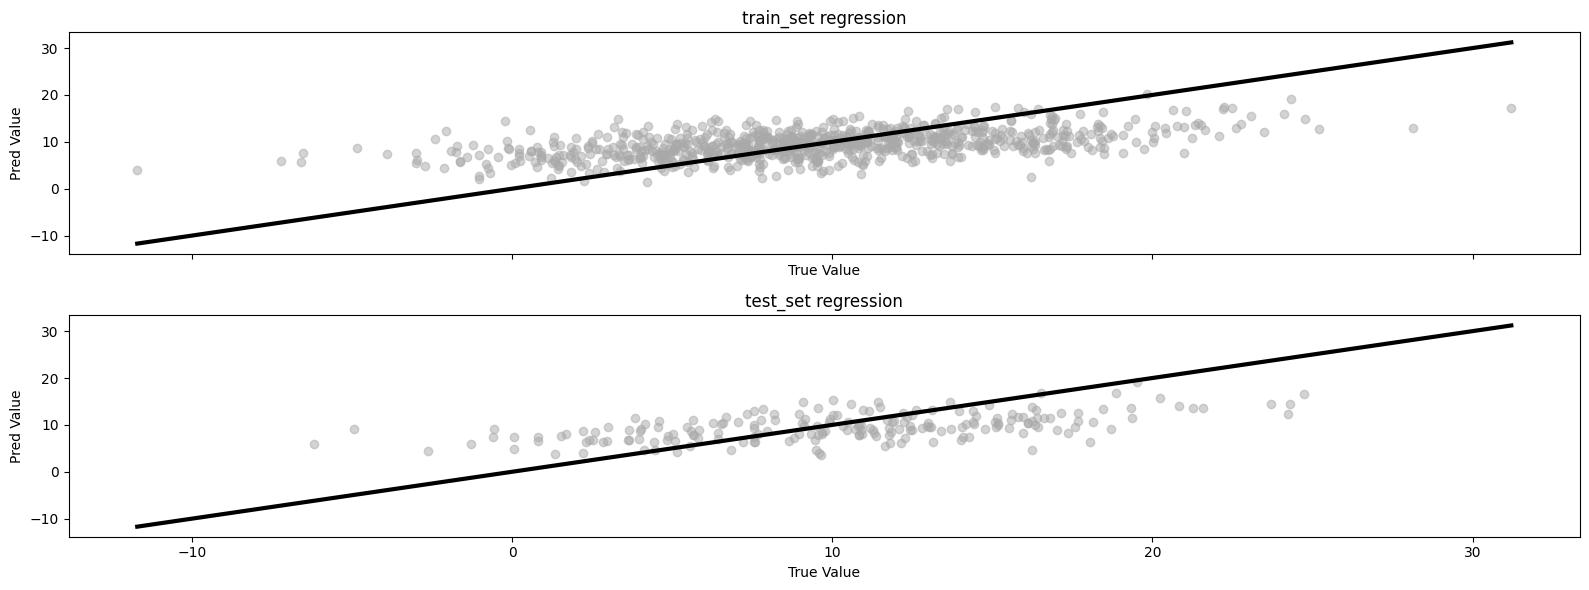

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(16, 6), sharex=True, sharey=True)

ax = axes[0]
ax.scatter(y_train, lr.predict(X_train), alpha=0.5, color='darkgray')
ax.plot(np.linspace(min(y), max(y), 10), np.linspace(min(y), max(y), 10), color='k', linewidth=3)
ax.set_title('train_set regression')
ax.set_xlabel('True Value')
ax.set_ylabel('Pred Value')

ax = axes[1]
ax.scatter(y_test, lr.predict(X_test), alpha=0.5, color='darkgray')
ax.plot(np.linspace(min(y), max(y), 10), np.linspace(min(y), max(y), 10), color='k', linewidth=3)
ax.set_xlabel('True Value')
ax.set_ylabel('Pred Value')
ax.set_title('test_set regression')
plt.tight_layout()
plt.show()

In [9]:
train_res

460     2.759076
571    -0.141456
557    -4.375237
312     7.437691
939    -2.909418
         ...    
49     -9.759483
26      6.409609
360    -5.929808
118     2.505906
168    11.343667
Name: target, Length: 800, dtype: float64

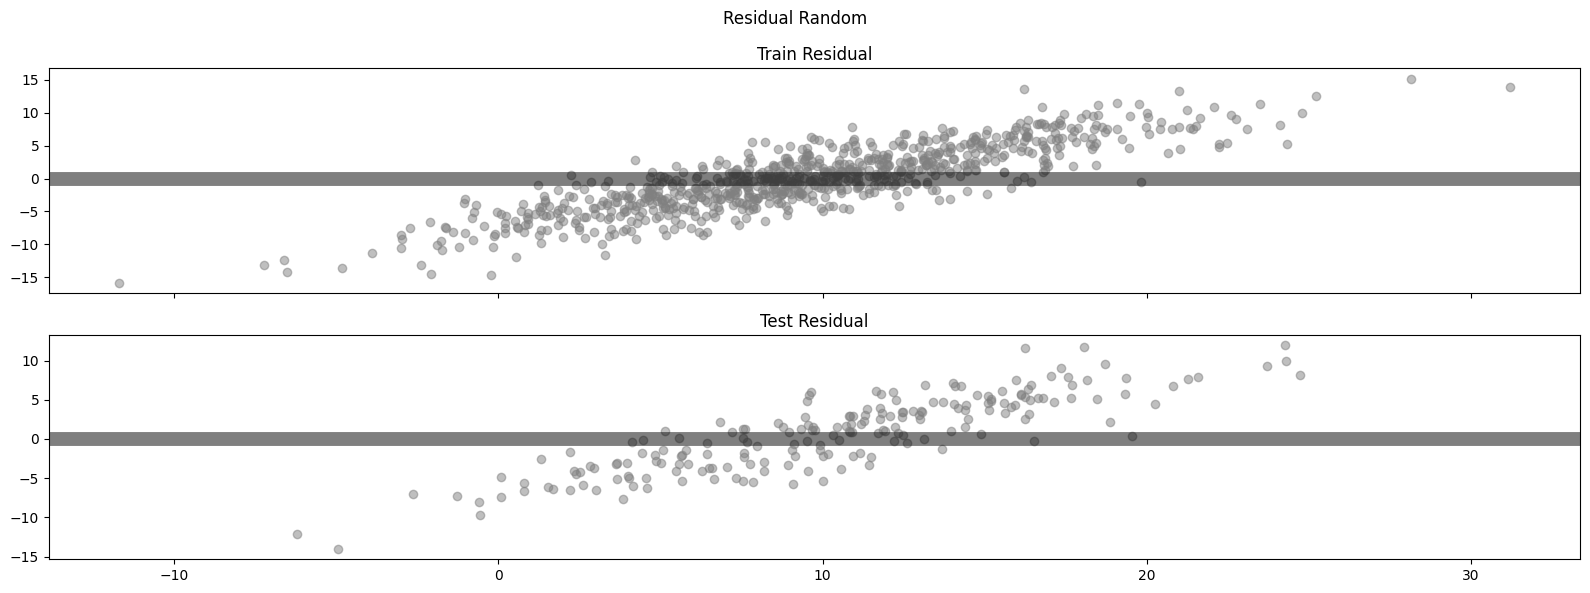

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(16, 6), sharex=True)

ax = axes[0]
train_res = y_train - lr.predict(X_train)
ax.scatter(y_train, train_res, color='gray', alpha=0.5)
ax.axhline(0, linewidth=10, alpha=0.5, color='black')
ax.set_title('Train Residual')

ax = axes[1]
test_res = y_test - lr.predict(X_test)
ax.scatter(y_test, test_res, color='gray', alpha=0.5)
ax.axhline(0, linewidth=10, alpha=0.5, color='black')
ax.set_title('Test Residual')
fig.suptitle('Residual Random')
plt.tight_layout()
plt.show()